In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.optim as optim
import math

# Making the data

In [2]:
weight = 0.4
bias = 0.5
X = torch.linspace(-20,20,300).unsqueeze(dim=1)
z = weight * X + bias

In [3]:
def plot_graph(x_train, y_train, x_test=None, y_test=None, prediction=None):
  plt.plot(x_train, y_train)
  if x_test is not None and y_test is not None:
    plt.plot(x_test, y_test)
  if prediction is not None:
    plt.plot(x_test, prediction)
  plt.show()

### Applying Sigmoid to the weighted sum 

In [4]:
sigmoid = nn.Sigmoid()

In [5]:
y = sigmoid(z)

# Plotting sigmoid curve

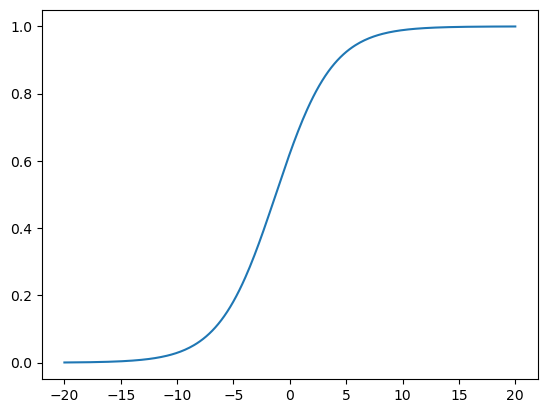

In [6]:
plot_graph(X.numpy(), y.numpy())

## Splitting the data for train and test

In [7]:
x_train = X[:int(0.8*len(X))]
y_train = y[:int(0.8*len(X))]
x_test = X[int(0.8*len(X)):]
y_test = y[int(0.8*len(X)):]

# Constructing a Logistic Model

## Model Definition

In [8]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, requires_grad=True))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True))
    def forward(self, x:torch.Tensor):
        z= self.weights * x + self.bias
        y = sigmoid(z)
        return y


### Model Instantiation

In [9]:
torch.manual_seed(42)
model = LogisticRegression()

In [10]:
list(model.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

## Loss function and Optimizer

In [11]:
optimizer = optim.SGD(model.parameters(),lr=0.01)
loss_fn = nn.BCELoss()

## Training Loop

In [12]:
epochs = 3000

model.train()
for epoch in range(epochs):
  y_pred = model(x_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f"epoch: {epoch} loss: {loss}")
with torch.inference_mode():
  y_pred = model(x_test)
  test_loss = loss_fn(y_pred,y_test)


epoch: 0 loss: 0.3351582884788513
epoch: 1 loss: 0.3345063328742981
epoch: 2 loss: 0.33385589718818665
epoch: 3 loss: 0.333208292722702
epoch: 4 loss: 0.33256328105926514
epoch: 5 loss: 0.33192068338394165
epoch: 6 loss: 0.3312806487083435
epoch: 7 loss: 0.3306431174278259
epoch: 8 loss: 0.3300083875656128
epoch: 9 loss: 0.3293757140636444
epoch: 10 loss: 0.32874584197998047
epoch: 11 loss: 0.3281187415122986
epoch: 12 loss: 0.32749369740486145
epoch: 13 loss: 0.32687193155288696
epoch: 14 loss: 0.326252818107605
epoch: 15 loss: 0.3256358802318573
epoch: 16 loss: 0.3250218629837036
epoch: 17 loss: 0.3244100511074066
epoch: 18 loss: 0.3238014876842499
epoch: 19 loss: 0.3231952488422394
epoch: 20 loss: 0.3225919008255005
epoch: 21 loss: 0.32199111580848694
epoch: 22 loss: 0.32139313220977783
epoch: 23 loss: 0.3207976222038269
epoch: 24 loss: 0.3202052414417267
epoch: 25 loss: 0.31961554288864136
epoch: 26 loss: 0.3190285265445709
epoch: 27 loss: 0.3184441030025482
epoch: 28 loss: 0.31786

## Testing

In [13]:
print(f"test loss: {test_loss}")
print(f"Accuracy: {1 - test_loss}")

test loss: 0.010529928840696812
Accuracy: 0.9894700646400452


## Visualizing

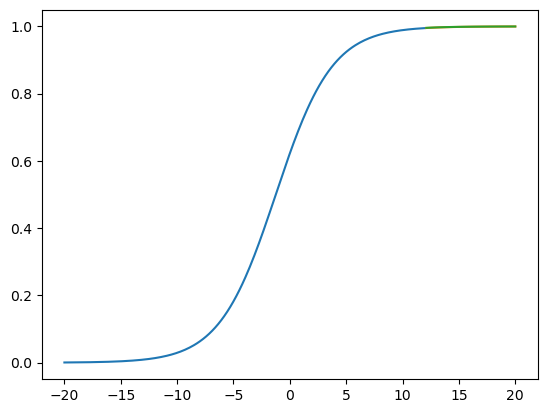

In [14]:
plot_graph(x_train, y_train, x_test.numpy(), y_test.numpy(), y_pred.numpy())